In [1]:
#first thing first: import the main libraries!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
seriea_df = pd.read_excel("C:/Users/ASUS/Desktop/serieA.xlsx")
seriea_df.info()
seriea_df.describe()
#we can see that there are two columns with null values: attendance and dist, so before proceeding with the analysis we decide how to treat them.
#If we decide to use them we would need to figure out how to replace the null values,
#if on the other hand we consider these variables to be useless for our objective then we can decide simply to eliminate them
#attendance: is the total attendance in the stadium and for our goal it's useless
#dist: is the average distance of the team and even in this case we decide to remove it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3762 non-null   datetime64[ns]
 1   time        3762 non-null   object        
 2   comp        3762 non-null   object        
 3   round       3762 non-null   object        
 4   day         3762 non-null   object        
 5   venue       3762 non-null   object        
 6   result      3762 non-null   object        
 7   gf          3762 non-null   float64       
 8   ga          3762 non-null   float64       
 9   opponent    3762 non-null   object        
 10  xg          3762 non-null   float64       
 11  xga         3762 non-null   float64       
 12  poss_x      3762 non-null   float64       
 13  attendance  2857 non-null   float64       
 14  captain     3762 non-null   object        
 15  formation   3762 non-null   object        
 16  referee     3762 non-nul

,date,gf,ga,xg,xga,poss_x,attendance,sh,sot,dist,...,prgdist,prog,prog.1,01-mar,cpa,mis,dis,targ,rec,rec%
count,3762,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,2857.000000,3762.000000,3762.000000,3759.000000,...,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000
mean,2020-01-14 22:08:36.746411264,1.436204,1.424508,1.372967,1.367358,50.024455,22728.609030,13.242424,4.281233,17.639851,...,1130.799043,44.129718,38.244551,14.048644,3.998937,11.919192,10.992557,462.651781,397.568315,85.143993
min,2017-08-19 00:00:00,0.000000,0.000000,0.000000,0.000000,19.000000,700.000000,0.000000,0.000000,7.800000,...,258.000000,4.000000,5.000000,1.000000,0.000000,1.000000,0.000000,143.000000,114.000000,59.900000
25%,2018-10-27 00:00:00,1.000000,0.000000,0.800000,0.800000,43.000000,12133.000000,9.000000,2.000000,15.600000,...,859.000000,30.000000,28.000000,10.000000,2.000000,9.000000,8.000000,378.000000,312.000000,81.725000
50%,2020-01-11 00:00:00,1.000000,1.000000,1.300000,1.200000,50.000000,18840.000000,13.000000,4.000000,17.500000,...,1096.500000,41.000000,37.000000,13.000000,4.000000,12.000000,11.000000,453.000000,389.000000,85.900000
75%,2021-04-03 00:00:00,2.000000,2.000000,1.800000,1.800000,57.000000,30000.000000,17.000000,6.000000,19.400000,...,1379.000000,55.000000,47.000000,18.000000,6.000000,15.000000,14.000000,535.000000,469.000000,89.100000
max,2022-05-22 00:00:00,7.000000,7.000000,5.600000,5.600000,81.000000,78328.000000,47.000000,17.000000,36.400000,...,2549.000000,127.000000,93.000000,46.000000,21.000000,29.000000,34.000000,944.000000,895.000000,99.200000
std,NaN,1.241101,1.237225,0.783824,0.782532,10.075648,15531.013464,5.639788,2.520559,3.062172,...,362.073823,18.546052,14.086479,6.214890,2.705426,4.048872,4.291115,117.684568,116.983209,5.659796


In [3]:
seriea_noatt_nodist = seriea_df.drop(['attendance', 'dist'], axis = 1)
seriea_noatt_nodist.info()
#at this point we clean up the dataset a bit from the variables that we are not interested in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3762 non-null   datetime64[ns]
 1   time       3762 non-null   object        
 2   comp       3762 non-null   object        
 3   round      3762 non-null   object        
 4   day        3762 non-null   object        
 5   venue      3762 non-null   object        
 6   result     3762 non-null   object        
 7   gf         3762 non-null   float64       
 8   ga         3762 non-null   float64       
 9   opponent   3762 non-null   object        
 10  xg         3762 non-null   float64       
 11  xga        3762 non-null   float64       
 12  poss_x     3762 non-null   float64       
 13  captain    3762 non-null   object        
 14  formation  3762 non-null   object        
 15  referee    3762 non-null   object        
 16  sh         3762 non-null   float64       


In [4]:
seriea = seriea_df.drop(['time','comp','round','day','attendance', 'captain', 'dist', 'fk', 'pk', 'pkatt', 'poss_y', 'touches', 'def pen', 'mid 3rd', 'att pen', 'live', 'succ', 'att', '#pl', 'megs', 'carries', 'totdist', 'prgdist', 'prog', 'prog.1', '01-mar', 'cpa', 'dis', 'targ', 'rec'], axis = 1)
seriea.info()
#The goal of our project is to find the variables that most influence winning.
#To begin, however, let us take a closer look at wins, draws and losses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3762 non-null   datetime64[ns]
 1   venue      3762 non-null   object        
 2   result     3762 non-null   object        
 3   gf         3762 non-null   float64       
 4   ga         3762 non-null   float64       
 5   opponent   3762 non-null   object        
 6   xg         3762 non-null   float64       
 7   xga        3762 non-null   float64       
 8   poss_x     3762 non-null   float64       
 9   formation  3762 non-null   object        
 10  referee    3762 non-null   object        
 11  sh         3762 non-null   float64       
 12  sot        3762 non-null   float64       
 13  def 3rd    3762 non-null   float64       
 14  att 3rd    3762 non-null   float64       
 15  succ%      3762 non-null   float64       
 16  mis        3762 non-null   float64       


In [5]:
def take_results(arr, l):
    for element in arr:
        l.append(element)
    return l

arr = seriea['result'].value_counts(ascending=False)
list_of_results = []
list_of_string_results = ['w', 'L', 'D']
take_results(arr, list_of_results)

[1427, 1406, 929]

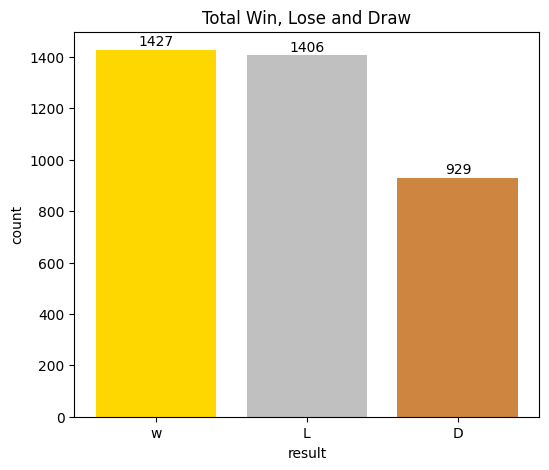

In [6]:
plt.figure(figsize=(6,5))
colors = ['gold','silver','peru']
x = list_of_string_results
y = list_of_results
barplot = plt.bar(x, y, color = colors)
plt.bar_label(barplot, labels = y, padding = 1)
plt.xlabel('result')
plt.ylabel('count')
plt.title('Total Win, Lose and Draw')
plt.show()